In [1]:
%matplotlib notebook
from scipy import ndimage
from scipy import misc
import imageio
import numpy as np
import matplotlib.pyplot as plt
import copy
import astropy
from astropy.io import fits

In [2]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [3]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [4]:
bias1= None
bias2= None
bias3= None

In [5]:
dark1= astropy.io.fits.open('darks/Dark1.fit')
dark2= astropy.io.fits.open('darks/Dark2.fit')
dark3= astropy.io.fits.open('darks/Dark3.fit')

In [6]:
darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data]) - master_bias

In [7]:
dark1 = None
dark2 = None
dark3 = None
master_bias=None

In [8]:
master_dark= np.median(darklist, axis=0)

In [9]:
darklist=None

In [10]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [11]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [12]:
bias1= None
bias2= None
bias3= None

In [13]:
darkybias= master_dark + master_bias

In [14]:
master_dark=None
master_bias=None

In [15]:
flatB1= astropy.io.fits.open('flats/B/FlatB1.fit')
flatB2= astropy.io.fits.open('flats/B/FlatB2.fit')
flatB3= astropy.io.fits.open('flats/B/FlatB3.fit')

In [16]:
flatBlist= np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data]), axis=0)

In [17]:
flatB1= None
flatB2= None
flatB3= None

In [18]:
master_flat_B= (flatBlist - darkybias)/(np.median(flatBlist - darkybias))

In [19]:
B1= astropy.io.fits.open('lights/B1.fit')
B1redux= np.divide(B1[0].data - darkybias, master_flat_B)

In [20]:
B2= astropy.io.fits.open('lights/B2.fit')
B2redux= np.divide(B2[0].data - darkybias, master_flat_B)

In [21]:
B3= astropy.io.fits.open('lights/B3.fit')
B3redux= np.divide(B3[0].data - darkybias, master_flat_B)

In [22]:
flatBlist=None
darkybias=None
B1=None
B2=None
B3=None

In [23]:
B1redux.shape

(4096, 4096)

In [24]:
B2redux.shape

(4096, 4096)

In [25]:
B3redux.shape

(4096, 4096)

In [26]:
print(np.mean(master_flat_B))
print(np.std(master_flat_B))

0.9834919565600444
0.1169444905418607


In [27]:
master_flat_B=None

<IPython.core.display.Javascript object>


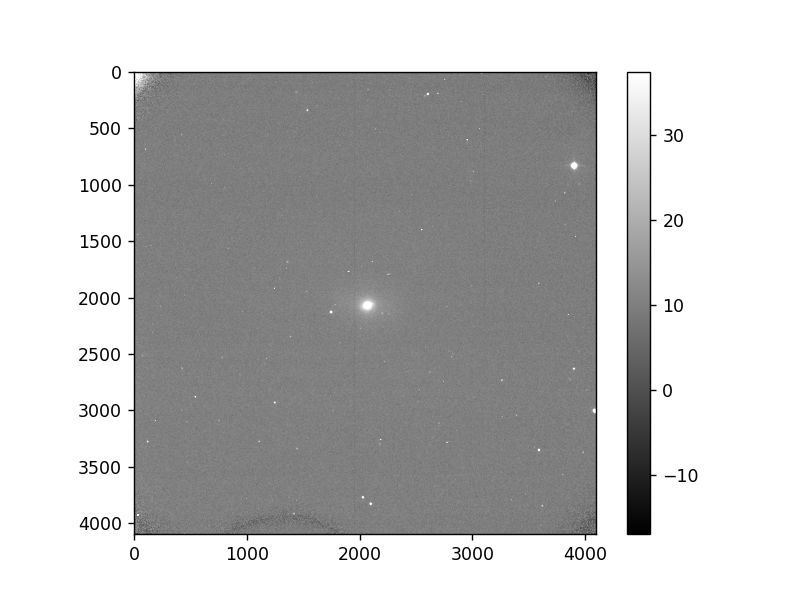

In [28]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(B1redux,cmap='gray',vmin=np.mean(B1redux)-np.std(B1redux),vmax=np.mean(B1redux)+np.std(B1redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


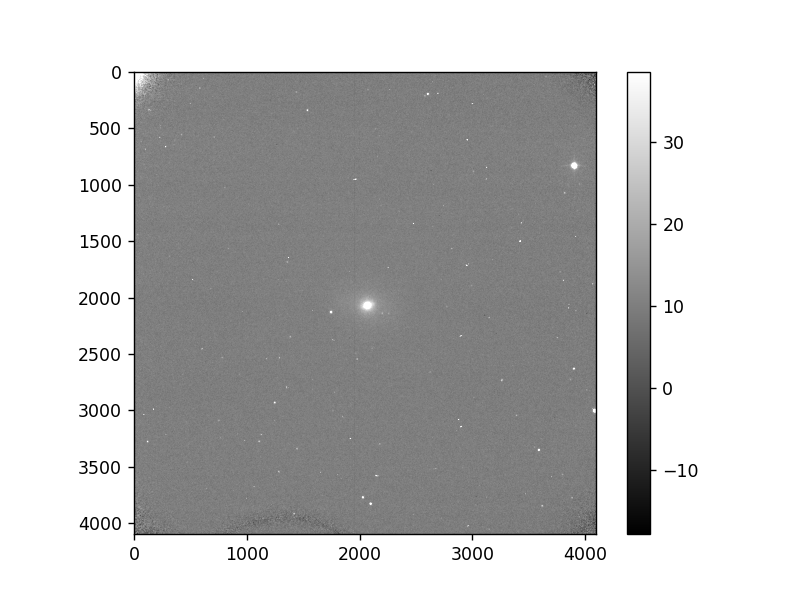

In [29]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(B2redux,cmap='gray',vmin=np.mean(B2redux)-np.std(B2redux),vmax=np.mean(B2redux)+np.std(B2redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


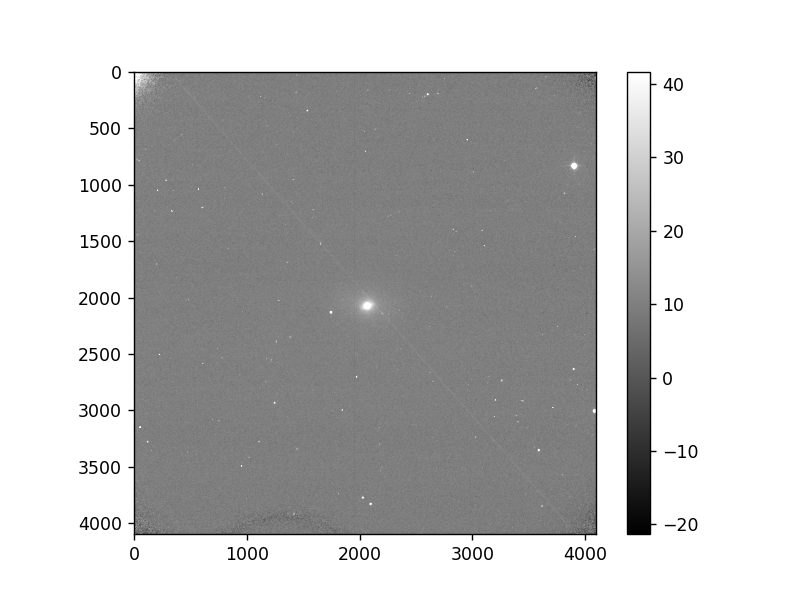

In [30]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(B3redux,cmap='gray',vmin=np.mean(B3redux)-np.std(B3redux),vmax=np.mean(B3redux)+np.std(B3redux))
plt.colorbar()
plt.show()